# Stage One: Import the libraries and Scrape your Page

I started by importing the Beautiful Soup and Pandas libraries. I then chose to scrape user reviews of "Sex Education" Season 3 from Metacritic using Beautiful Soup. Note: I didn't realize this was such a small data set when I picked it, and this would work better with a larger dataset. 

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url = 'https://www.metacritic.com/tv/sex-education/season-3/user-reviews'

user_agent = {'User-agent': 'Mozilla/5.0'}
response = requests.get(url, headers = user_agent)

soup = BeautifulSoup(response.text, 'html.parser')

# Stage Two: Define an Empty Dictionary Reflecting the Data Categories

I then created a dictionary of reviews using the key terms "name," "date," "rating," and "review" and created lists of those items. 

In [3]:
review_dict = {'name':[], 'date':[], 'rating':[], 'review':[]}

# Stage Three: Loop through and Store Structured Data

I am telling the program to skip any reviews that don't contain text, and pulling text out of the html file for each of the lists above. If the review starts with "blurb blurb_expanded" I grab the text after that. If the review starts with "review_body" but doesn't have the tag "span" that means the review doesn't contain text and should be skipped. Last, if the review starts with "review_body" followed by the "span" tag, I collect that text. 

In [4]:
for review in soup.find_all('div', class_='review_content'): 
    if review.find('div', class_='name') == None:
        break 
    review_dict['name'].append(review.find('div', class_='name').find('a').text)
    review_dict['date'].append(review.find('div', class_='date').text)
    review_dict['rating'].append(review.find('div', class_='review_grade').find_all('div')[0].text)
    if review.find('span', class_='blurb blurb_expanded'): 
        review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
        print(review.find('span', class_='blurb blurb_expanded').text)
    elif review.find('div',class_='review_body').find('span') == None:
        review_dict['review'].append('No review text.')
        print("No review")
    else:
        review_dict['review'].append(review.find('div',class_='review_body').find('span').text)
        print(review.find('div',class_='review_body').find('span').text)

Sex Education used to be fun to watch for seasons 1 and 2. But season 3 had far too much pain and hopelessness and had entirely too many plot lines which made them shallow. I just finished watching Season 3, and I can't think of a single character that survived unscathed. It felt like Netflix borrowed writers from 13 Reasons Why...putting the fun, giddy, characters and actually twisting the plots to inflict such pain. I kept waiting for a suicide. It was too heavy and had way too many arguments and breakups. It list all the fun. Very disappointing.
Amazing, emotional season 3. Watching the relationships of all these cool characters is insanely interesting and intriguing. And sad.. I'm really looking forward to continuing !
The TV series keeps being dynamic, intelligent, enjoyable and just a highly recommended show period
possessing outstanding quality or superior merit; remarkably good.
With a raw and emotional beginning of this season, most of the characters have a good development th

# Stage Four: Convert from Dictionary to DataFrame and Display

Then, I am converting my scraped text, "review_dict" to a pandas dataframe, "se3_reviews," turning the key words form the dictionary into the columns of my new dataframe. 

In [5]:
se3_reviews = pd.DataFrame(review_dict)

In [6]:
se3_reviews

,name,date,rating,review
0,videogayme,"Sep 22, 2021",1,Sex Education used to be fun to watch for seas...
1,RanGom007,"Sep 18, 2021",10,"Amazing, emotional season 3. Watching the rela..."
2,Hades00,"Sep 18, 2021",10,"The TV series keeps being dynamic, intelligent..."
3,MetacriticOnur,"Sep 17, 2021",8,excellent\r[ ek-suh-luhnt ]\r adjective\rposse...
4,PotterheadGleek,"Sep 19, 2021",9,With a raw and emotional beginning of this sea...
5,Monster507,"Sep 26, 2021",10,"Una de las mejores temporadas, el guion, las a..."
6,SiamHarleyRider,"Sep 26, 2021",10,"One of the best shows on TV now. However, like..."


# Stage Five: Plot some Aspect of the Data

I plotted the most common ratings of the show using a bar graph, revealing the most common rating of the show was "10" with 4 reviews, with "8" and "9" only having one review each but still being similarly high, and a very low outlier rating of "1." As this new season receives more reviews, plotting these rankings and seeing patterns would become more interesting. 

<AxesSubplot:title={'center':'Most Common Ratings'}>

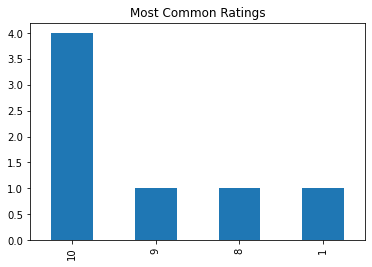

In [10]:
se3_reviews['rating'].value_counts().plot(kind="bar", title="Most Common Ratings")